In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

from sklearn.model_selection import train_test_split

In [92]:
# Sales dataset
train=pd.read_csv("src/sales_train.csv")
test=pd.read_csv("src/test.csv")

# Exploring the data and Data Pre-processing

In [107]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,1.359677e+18,0,59,22154,999.00,1.0
1,1.362096e+18,0,25,2552,899.00,1.0
2,1.367366e+18,0,25,2552,899.00,-1.0
3,1.370045e+18,0,25,2554,1709.05,1.0
4,1.358208e+18,0,25,2555,1099.00,1.0


In [95]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [96]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


Checking for missing values in the dataset

In [100]:
df.isna().sum()

date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

Checking values in date column

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


convert date field from string to datetime as numeric

In [102]:
train['date'] = train['date'].astype('datetime64').astype(int).astype(float)

In [103]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,1.359677e+18,0,59,22154,999.00,1.0
1,1.362096e+18,0,25,2552,899.00,1.0
2,1.367366e+18,0,25,2552,899.00,-1.0
3,1.370045e+18,0,25,2554,1709.05,1.0
4,1.358208e+18,0,25,2555,1099.00,1.0


In [104]:
train.corr()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,1.000000,0.950921,0.017271,0.008710,0.089546,0.006019
date_block_num,0.950921,1.000000,0.019273,0.009356,0.095010,0.009402
shop_id,0.017271,0.019273,1.000000,0.029396,-0.024034,-0.005230
item_id,0.008710,0.009356,0.029396,1.000000,-0.134104,0.016650
item_price,0.089546,0.095010,-0.024034,-0.134104,1.000000,0.011197
item_cnt_day,0.006019,0.009402,-0.005230,0.016650,0.011197,1.000000


We will use  date_blok_num instead of date

In [ ]:
train=train.drop("date",axis=1)

In [112]:
train

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,59,22154,999.00,1.0
1,0,25,2552,899.00,1.0
2,0,25,2552,899.00,-1.0
3,0,25,2554,1709.05,1.0
4,0,25,2555,1099.00,1.0
...,...,...,...,...,...
2935844,33,25,7409,299.00,1.0
2935845,33,25,7460,299.00,1.0
2935846,33,25,7459,349.00,1.0
2935847,33,25,7440,299.00,1.0


In [158]:
train.groupby(["date_block_num","shop_id","item_id","item_price"]).count()

item_cnt_day
date_block_num shop_id item_id item_price              
0              0       32      221.0                  4
                       33      347.0                  3
                       35      247.0                  1
                       43      221.0                  1
                       51      127.0                  1
...                                                 ...
33             59      22087   119.0                  3
                       22088   119.0                  2
                       22091   179.0                  1
                       22100   629.0                  1
                       22102   1250.0                 1

[1739022 rows x 1 columns]

In [148]:
item_cnt_month=train.groupby("date_block_num").mean()["item_cnt_day"]

In [134]:
item_cnt_month

date_block_num
0     1.136477
1     1.179325
2     1.212572
3     1.138998
4     1.165771
5     1.248777
6     1.163285
7     1.195844
8     1.386896
9     1.353910
10    1.343957
11    1.279910
12    1.176650
13    1.221051
14    1.243322
15    1.239391
16    1.245272
17    1.182276
18    1.158964
19    1.185963
20    1.356097
21    1.353587
22    1.363505
23    1.290314
24    1.253598
25    1.172543
26    1.172014
27    1.383001
28    1.325346
29    1.173884
30    1.137500
31    1.158691
32    1.439926
33    1.327802
Name: item_cnt_day, dtype: float64

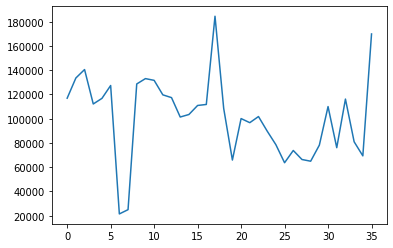

In [166]:
sales_month=pd.DataFrame(df.groupby(['date_block_num']).sum().item_cnt_day).reset_index()
sales_month.columns = ['date_block_num', 'sum_items_sold']
plt.plot(sales_month.sum_items_sold)

## Aggregate data

In [194]:
groupby_cols = ['date_block_num', 'shop_id', 'item_id']

In [195]:
gb = train.groupby(by=groupby_cols, as_index=False).agg({'item_cnt_day': ['sum']})
gb

,date_block_num,shop_id,item_id,item_cnt_day
,,,,sum
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1609119,33,59,22087,6.0
1609120,33,59,22088,2.0
1609121,33,59,22091,1.0


In [196]:
gb.columns = [val[0] if val[-1] == '' else '_'.join(val) for val in gb.columns.values]
gb

,date_block_num,shop_id,item_id,item_cnt_day_sum
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1609119,33,59,22087,6.0
1609120,33,59,22088,2.0
1609121,33,59,22091,1.0
1609122,33,59,22100,1.0


In [197]:
gb.rename(columns={'item_cnt_day_sum': 'target'}, inplace=True)


In [198]:
gb

,date_block_num,shop_id,item_id,target
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1609119,33,59,22087,6.0
1609120,33,59,22088,2.0
1609121,33,59,22091,1.0
1609122,33,59,22100,1.0


In [199]:
df = pd.merge(df, gb, how='left', on=groupby_cols)


In [200]:
df

,date_block_num,shop_id,item_id,item_price,item_cnt_day,target
0,225656,3095780,1038682227,7.060131e+07,116950.0,NaN
1,283009,3382266,1102025872,7.827604e+07,133607.0,NaN
2,358395,3787900,1172302372,8.109691e+07,140586.0,NaN
3,373298,3181701,987402995,6.406593e+07,112185.0,NaN
4,422772,3085008,960114246,6.355117e+07,116808.0,NaN
5,513976,3313588,1045019496,6.865706e+07,127421.0,NaN
6,623042,3624818,1140622173,7.028078e+07,128686.0,NaN
7,687542,3630566,1105381010,7.228013e+07,131676.0,NaN
8,676794,3279509,1003143161,7.519246e+07,133110.0,NaN
9,715776,3163738,977837110,7.151172e+07,119723.0,NaN
